In [1]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model
from keras.layers import Input
import numpy as np

Using TensorFlow backend.


In [2]:
 base_model = InceptionV3(
                weights='imagenet',
                include_top=True
            )

In [3]:
model = Model(
                inputs=base_model.input,
                outputs=base_model.get_layer('avg_pool').output
            )

In [4]:
img = image.load_img("test.jpg", target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [5]:
# Get the prediction.
features = model.predict(x)

In [6]:
argmax = np.argmax(features[0])

output = model.output[:, argmax]

In [7]:
model.summary() #conv2d_94

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [8]:
last_conv_layer = model.get_layer('conv2d_94')

In [9]:
from keras import backend as K
grads = K.gradients(output, last_conv_layer.output)[0]

In [10]:

pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [11]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [12]:
pooled_grads_value, conv_layer_output_value = iterate([x])

In [13]:
for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt
heatmap = np.mean(conv_layer_output_value, axis=-1)

C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\colors.py:902: UserWarning: Warning: converting a masked element to nan.
  dt

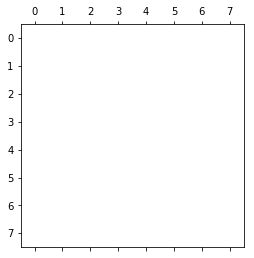

In [15]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\godson.dsilva\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\colors.py:902: UserWarning: Warning: converting a masked element to nan.
  dt

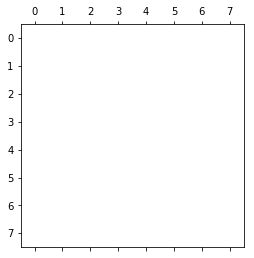

In [17]:

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
#plt.show()

In [18]:
plt.show()